<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/Handwritten_digit_prediction_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network for predicting handwritten digits**

##**Generating data**

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test)= digits = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


##**Changing 3D arrays to 2D arrays**

In [4]:
import numpy as np
X_train = np.array([X_train[i].ravel() for i in range(X_train.shape[0])])

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_test = np.array([X_test[i].ravel() for i in range(X_test.shape[0])])
X_test.shape

(10000, 784)

##**Defining the model**

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
])

In [19]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.optimizers.Adam(0.00001),)

##**Fitting data into our model**

In [20]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0796
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0697
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0682
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0662
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0654
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648
Epoch 9/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0642
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637
Epoch 11/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632
Epoch 12/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0628
E

##**Model's predictions**

In [21]:
z = model.predict(X_test)
z

313/313 [==============================] - 1s 1ms/step


array([[  72.16857  ,  141.73775  ,   96.48515  , ...,  154.52151  ,
         121.25679  ,  132.14868  ],
       [  -0.627826 ,   -3.3008962,    5.777237 , ...,   -2.4945285,
           0.6228762,    0.7712919],
       [-230.27592  ,  258.76544  ,   64.82611  , ..., -130.3381   ,
         -27.08746  , -234.17287  ],
       ...,
       [  34.202644 ,   43.17494  ,   33.014576 , ...,   53.978813 ,
          40.810585 ,   55.017437 ],
       [ 138.34541  ,  144.58145  ,   81.53359  , ...,  156.82513  ,
         158.51685  ,  143.86653  ],
       [ 116.74089  ,  120.48703  ,   86.29796  , ...,   48.32769  ,
         111.52056  ,   98.84621  ]], dtype=float32)

##**Converting predicted values to digits**

In [22]:
pred = np.array([np.argmax(z[i]) for i in range(len(z))])
pred

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
print(pred.shape)
print(y_test.shape)

(10000,)
(10000,)


##**Accuracy of our Neural Network**

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)*100

95.38

<Axes: >

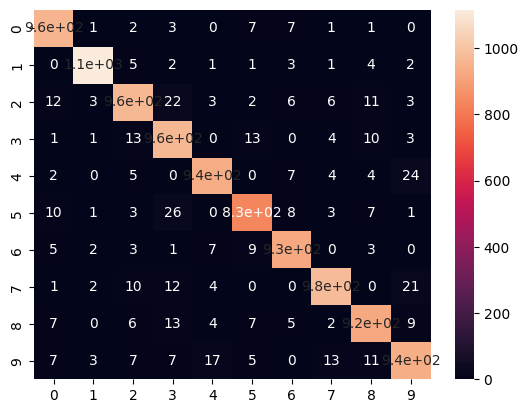

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)